In [165]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from numpy.polynomial.polynomial import polyfit

 # First Dataset (Military Spending)

### To extract top 10 miliatry spending countries

In [166]:
#optional
#load the data, if excel
ms = pd.read_excel('Military_API_MS.MIL.XPND.GD.ZS_DS2_en_excel_v2_761.xls', skiprows=3)
ms.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,ABW,Military expenditure (% of GDP),MS.MIL.XPND.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,Military expenditure (% of GDP),MS.MIL.XPND.GD.ZS,NaN,1.5370,2.0919,1.8824,2.4561,2.4864,...,1.7591,1.5352,1.2746,1.2724,1.1188,1.0740,1.1028,1.0058,1.0001,NaN
2,Afghanistan,AFG,Military expenditure (% of GDP),MS.MIL.XPND.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,1.2980,0.9946,0.9568,0.9452,1.0067,1.1710,1.3589,1.8279,NaN,NaN
3,Africa Western and Central,AFW,Military expenditure (% of GDP),MS.MIL.XPND.GD.ZS,NaN,NaN,1.3154,1.3140,1.4423,1.4686,...,0.7314,0.6773,0.8265,0.8221,0.8470,0.8010,0.9497,1.1650,0.9733,NaN
4,Angola,AGO,Military expenditure (% of GDP),MS.MIL.XPND.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,4.6985,3.1054,2.7333,2.5080,1.9558,1.7391,1.7002,1.2899,1.3287,NaN


In [167]:
#print the names of the columns
print(ms.columns)

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       '2023'],
      dtype='object')


In [168]:
#finding the top 10 military spenders from 2017-2022

#sum the military spending across all years for each country
military_total = ms.groupby('Country Name').sum()

#calculate the total military spending for each country from 2017 to 2022
military_total['Total'] = military_total.loc[:, '2017':'2022'].sum(axis=1)

#sort the countries based on their total military spending
top_ten_countries = military_total.nlargest(50, 'Total')['Total']

#print the top ten countries
print(top_ten_countries)

Country Name
Saudi Arabia                                         51.6773
Ukraine                                              50.1837
Oman                                                 43.8760
Algeria                                              34.4650
Kuwait                                               33.9087
Arab World                                           33.5488
Middle East & North Africa                           30.9039
Israel                                               30.5285
Jordan                                               28.1673
Armenia                                              26.5278
Azerbaijan                                           26.3986
Russian Federation                                   23.7774
Bahrain                                              23.1634
Morocco                                              21.4535
United States                                        20.6879
Lebanon                                              19.9980
Namibia    

In [169]:
#listing the top countries
top_countries = ['United States', 'China', 'India', 'Saudi Arabia', 'Russian Federation', \
                 'United Kingdom', 'Germany', 'France', 'Japan', 'Korea, Rep.']

#years 2017 to 2022
years = list(range(2017, 2023))
years

[2017, 2018, 2019, 2020, 2021, 2022]

In [170]:
#filter rows for the top countries
military = ms[ms['Country Name'].isin(top_countries)]

#filter columns for the specified years
military = military[['Country Name'] + [str(year) for year in years]]


military

,Country Name,2017,2018,2019,2020,2021,2022
40,China,1.7112,1.6736,1.6829,1.7567,1.6131,1.5954
55,Germany,1.1534,1.1705,1.2622,1.3736,1.3268,1.3901
77,France,1.9086,1.8430,1.8365,2.0028,1.9154,1.9387
81,United Kingdom,1.9477,1.9400,1.9813,2.1568,2.1616,2.2272
109,India,2.5315,2.4243,2.5486,2.8125,2.4714,2.4252
119,Japan,0.9132,0.9625,0.9922,1.0178,1.0183,1.0777
126,"Korea, Rep.",2.4215,2.4968,2.6713,2.8033,2.8090,2.7177
202,Russian Federation,4.2490,3.7198,3.8603,4.1715,3.7205,4.0563
205,Saudi Arabia,10.2238,9.1372,8.1336,9.1785,7.5815,7.4227
251,United States,3.3205,3.3239,3.4346,3.6960,3.4580,3.4549


In [171]:
#reindexing the DataFrames to match the top_countries_desc order
military = military.set_index('Country Name').loc[top_countries].reset_index()
military

,Country Name,2017,2018,2019,2020,2021,2022
0,United States,3.3205,3.3239,3.4346,3.6960,3.4580,3.4549
1,China,1.7112,1.6736,1.6829,1.7567,1.6131,1.5954
2,India,2.5315,2.4243,2.5486,2.8125,2.4714,2.4252
3,Saudi Arabia,10.2238,9.1372,8.1336,9.1785,7.5815,7.4227
4,Russian Federation,4.2490,3.7198,3.8603,4.1715,3.7205,4.0563
5,United Kingdom,1.9477,1.9400,1.9813,2.1568,2.1616,2.2272
6,Germany,1.1534,1.1705,1.2622,1.3736,1.3268,1.3901
7,France,1.9086,1.8430,1.8365,2.0028,1.9154,1.9387
8,Japan,0.9132,0.9625,0.9922,1.0178,1.0183,1.0777
9,"Korea, Rep.",2.4215,2.4968,2.6713,2.8033,2.8090,2.7177


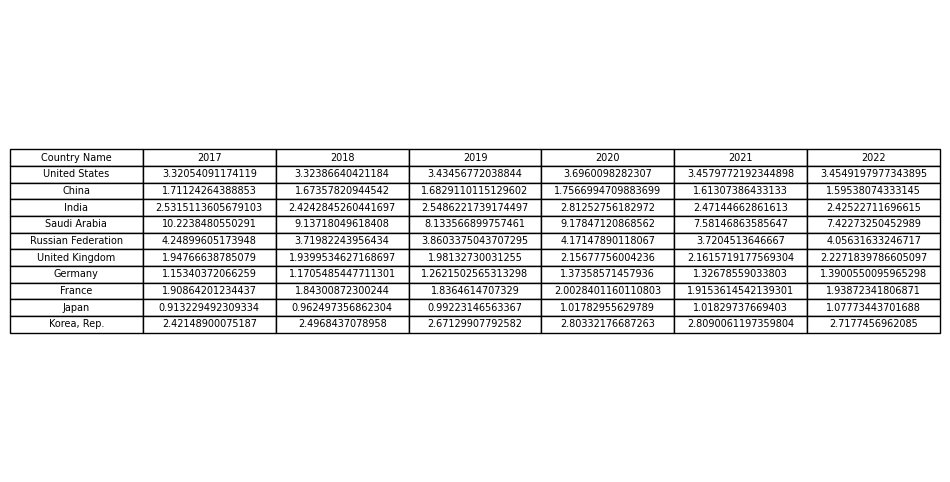

In [91]:
#data shows the top 10 military spenders 

#create a table plot
fig, ax = plt.subplots(figsize=(12, 6))
ax.axis('off')  # Hide the axes
ax.table(cellText=military.head(10).values,
         colLabels=military.columns,
         cellLoc='center',
         loc='center')

#save the chart as a PNG file with high resolution (300 DPI)
plt.savefig('total_top_10_military_per.png', dpi=300, bbox_inches='tight', pad_inches=0.2) 
plt.show()

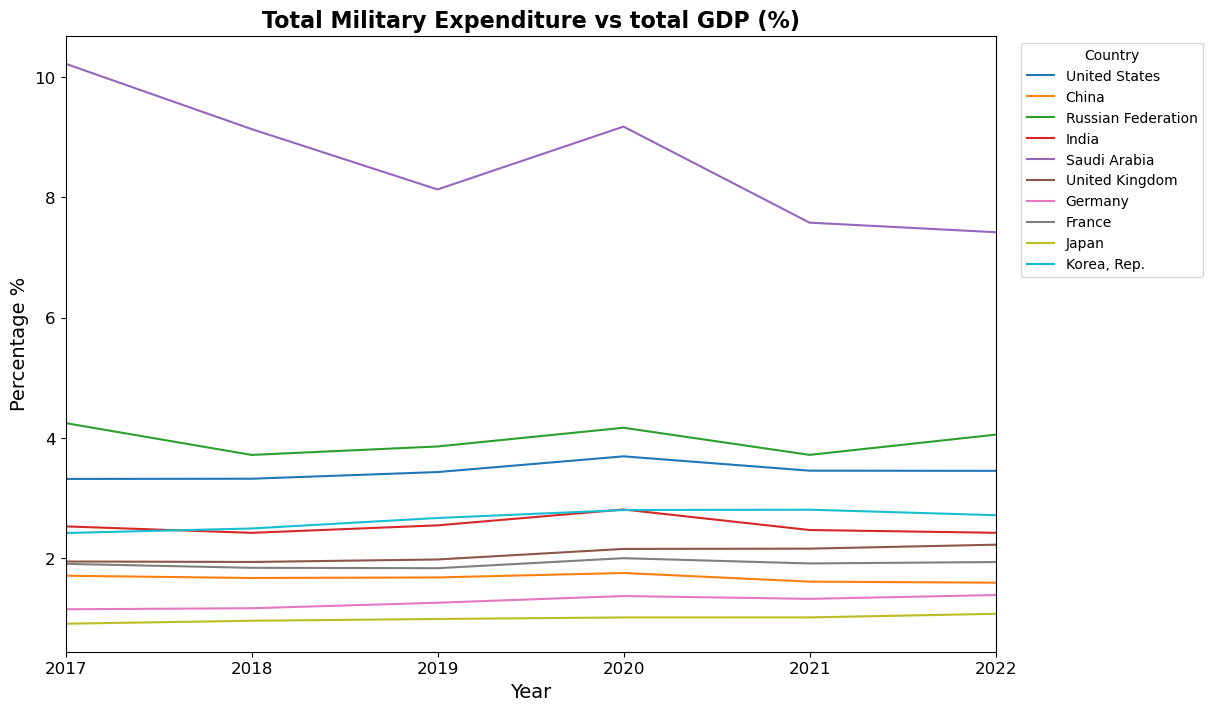

In [172]:
import matplotlib.pyplot as plt

# List of top countries to plot
top_countries = ['United States', 'China', 'Russian Federation', 'India', 'Saudi Arabia', 
                 'United Kingdom', 'Germany', 'France', 'Japan', 'Korea, Rep.']

# Extract unique country names from the 'Country Name' column
countries = military['Country Name'].unique()

# Reorder countries to match the top_countries list
countries = [country for country in top_countries if country in countries]

# Set a larger figure size for the plot
plt.figure(figsize=(12, 8))

# Plot the military spending for each country over the years 2017-2022
for country in countries:
    # Extract the data for the given country and convert to billions
    spending_data = military.loc[military['Country Name'] == country, '2017':'2022'].values.flatten()
    plt.plot(spending_data, label=country)

# Add title and labels to the plot
plt.title('Total Military Expenditure vs total GDP (%)', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Percentage %', fontsize=14)

# Add a legend with country names
plt.legend(title='Country', loc='upper left', fontsize=10, bbox_to_anchor=(1.02, 1), ncol=1)

# Set x-axis labels for the years 2017-2022
plt.xticks(ticks=range(6), labels=['2017', '2018', '2019', '2020', '2021', '2022'], fontsize=12)
plt.yticks(fontsize=12)

# Optional: disable grid if you prefer
plt.grid(False)

# Adjust margins to remove extra space
plt.margins(x=0)

# Save the chart as a PNG file with high resolution (300 DPI) **before** showing it
plt.savefig('total_military_spending_per2.png', dpi=300, bbox_inches='tight', pad_inches=0.2) # Increase padding

# Show the plot
plt.show()


# Second Dataset (Sipri Milex Data)

## To Find:
### Compare the military data to that country's GDP (% comparison)
### Compare overall military of spending of all 10 countries to each other in absolute value and in %
### compare per person military spending to the per person GDP (in absolute and in %)
### Fastest growing countries in military spending in fixed value and in %


In [145]:
# read the excel file and check the sheets name
df = pd.ExcelFile("SIPRI-Milex-data-1948-2023.xlsx")
print(df.sheet_names)
# set all the data to 4 decimal
pd.set_option("display.float.format", lambda x: "%.4f" % x) 

['Front page', 'Regional totals', 'Local currency financial years', 'Local currency calendar years', 'Constant (2022) US$', 'Current US$', 'Share of GDP', 'Per capita', 'Share of Govt. spending', 'Footnotes']


In [146]:
# import the sheet "military spending in current USD", skip rows and set index.
military_spending = df.parse("Current US$", skiprows=5, index_col=0)
# import the sheet "military spending Share of GDP", skip rows and set index.
military_GDP = df.parse("Share of GDP", skiprows=5, index_col=0)  
# import the sheet "per person military spending", skip rows and set index.
military_capta = df.parse("Per capita", skiprows=6, index_col=0)  
# veiw the data..head()
military_spending.head()

,Notes,1948,1949,1950,1951,1952,1953,1954,1955,1956,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Country,,,,,,,,,,,,,,,,,,,,,
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
North Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Algeria,§,...,...,...,...,...,...,...,...,...,...,9724.3800,10412.7140,10217.0817,10073.3640,9583.7243,10303.6006,9708.2774,9112.4611,9145.8102,18263.9680
Libya,‡§¶,...,...,...,...,...,...,...,...,...,...,3755.6525,...,...,...,...,...,...,...,...,...


In [147]:
military_GDP.head()

,Notes,1948,1949,1950,1951,1952,1953,1954,1955,1956,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Country,,,,,,,,,,,,,,,,,,,,,
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
North Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Algeria,§,...,...,...,...,...,...,...,...,...,...,0.0555,0.0627,0.0638,0.0592,0.0548,0.0600,0.0666,0.0557,0.0470,0.0817
Libya,‡§¶,...,...,...,...,...,...,...,...,...,...,0.1548,...,...,...,...,...,...,...,...,...


In [148]:
military_capta.head()

,Notes,1988,1989,1990,1991,1992,1993,1994,1995,1996,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Country,,,,,,,,,,,,,,,,,,,,,
Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
North Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Algeria,§,42.4292,34.3231,35.4365,21.6231,39.3787,46.6810,47.7829,43.3547,50.1097,...,250.8870,263.3264,253.2805,244.8736,228.5812,241.2739,223.4253,206.2669,203.6793,400.4729
Libya,‡§¶,...,...,...,...,...,...,...,...,...,...,615.8827,...,...,...,...,...,...,...,...,...
Morocco,§,38.6691,41.0202,43.5359,45.9599,48.3653,48.5057,52.1048,54.0584,53.5993,...,118.2111,94.2435,94.7683,97.4291,102.8963,102.5045,131.6732,145.0594,133.3501,137.0224


In [149]:
"""Clean the data. 
There is "xxx", ". ." and "NaN" in the data set. 
"xxx" means country did not exist or was not independent during all or part of the year in question.
". ." means data unavailable.
"NaN" means not a number.
We just replace them all by missing value "Na". As almost every row has NaN value in the 1950s we do not drop "Na" rows here. 
If there is "Na" value in the subset we use later, we will do further cleaning use df.dropna() function.
"""
military_spending.replace(("xxx",". ."), "Na", inplace=True)
military_spending.fillna("Na", inplace=True)
military_GDP.replace(("xxx",". ."), "Na", inplace=True)
military_GDP.fillna("Na", inplace=True)
military_capta.replace(("xxx",". ."), "Na", inplace=True)
military_capta.fillna("Na", inplace=True)
# check the data 
military_spending.head()

,Notes,1948,1949,1950,1951,1952,1953,1954,1955,1956,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Country,,,,,,,,,,,,,,,,,,,,,
NaN,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,...,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na
Africa,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,...,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na
North Africa,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,...,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na
Algeria,§,...,...,...,...,...,...,...,...,...,...,9724.3800,10412.7140,10217.0817,10073.3640,9583.7243,10303.6006,9708.2774,9112.4611,9145.8102,18263.9680
Libya,‡§¶,...,...,...,...,...,...,...,...,...,...,3755.6525,...,...,...,...,...,...,...,...,...


In [150]:
military_GDP.head()

,Notes,1948,1949,1950,1951,1952,1953,1954,1955,1956,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Country,,,,,,,,,,,,,,,,,,,,,
NaN,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,...,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na
Africa,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,...,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na
North Africa,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,...,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na
Algeria,§,...,...,...,...,...,...,...,...,...,...,0.0555,0.0627,0.0638,0.0592,0.0548,0.0600,0.0666,0.0557,0.0470,0.0817
Libya,‡§¶,...,...,...,...,...,...,...,...,...,...,0.1548,...,...,...,...,...,...,...,...,...


In [151]:
military_capta.head()

,Notes,1988,1989,1990,1991,1992,1993,1994,1995,1996,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Country,,,,,,,,,,,,,,,,,,,,,
Africa,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,...,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na
North Africa,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,...,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na
Algeria,§,42.4292,34.3231,35.4365,21.6231,39.3787,46.6810,47.7829,43.3547,50.1097,...,250.8870,263.3264,253.2805,244.8736,228.5812,241.2739,223.4253,206.2669,203.6793,400.4729
Libya,‡§¶,...,...,...,...,...,...,...,...,...,...,615.8827,...,...,...,...,...,...,...,...,...
Morocco,§,38.6691,41.0202,43.5359,45.9599,48.3653,48.5057,52.1048,54.0584,53.5993,...,118.2111,94.2435,94.7683,97.4291,102.8963,102.5045,131.6732,145.0594,133.3501,137.0224


In [152]:
# check the data type
military_spending.info()
military_GDP.info()
military_capta.info()

<class 'pandas.core.frame.DataFrame'>
Index: 193 entries, nan to Yemen
Data columns (total 77 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Notes   193 non-null    object
 1   1948    193 non-null    object
 2   1949    193 non-null    object
 3   1950    193 non-null    object
 4   1951    193 non-null    object
 5   1952    193 non-null    object
 6   1953    193 non-null    object
 7   1954    193 non-null    object
 8   1955    193 non-null    object
 9   1956    193 non-null    object
 10  1957    193 non-null    object
 11  1958    193 non-null    object
 12  1959    193 non-null    object
 13  1960    193 non-null    object
 14  1961    193 non-null    object
 15  1962    193 non-null    object
 16  1963    193 non-null    object
 17  1964    193 non-null    object
 18  1965    193 non-null    object
 19  1966    193 non-null    object
 20  1967    193 non-null    object
 21  1968    193 non-null    object
 22  1969    193 non-null    obj

In [153]:
# check the column name type
military_spending.columns.map(type)
military_GDP.columns.map(type)
military_capta.columns.map(type)

Index([<class 'str'>, <class 'int'>, <class 'int'>, <class 'int'>,
       <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>,
       <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>,
       <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>,
       <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>,
       <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>,
       <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>,
       <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>,
       <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>,
       <class 'int'>],
      dtype='object')

In [154]:
# define function to select relevant dataframe
def display_relevant(df):
    rowname = ["United States of America", "China", "Germany",
               "United Kingdom", "France","Italy","Canada", "Saudi Arabia", "Korea, South", "Russia"]
    colname = [2019, 2020, 2021, 2022, 2023]
    df = df.loc[rowname, colname]
    # change the data type to float
    df = df.iloc[0:11, 0:7].astype(dtype="float64")
    return df

In [155]:
# select relevant data frame of total military spending and sort the data by Country's alphabet
military_spending = display_relevant(military_spending).sort_values("Country")
military_spending

,2019,2020,2021,2022,2023
Country,,,,,
Canada,22394.8757,23082.7740,25362.2408,25567.9439,27221.5434
China,240332.5555,257973.4298,285930.5181,291958.4285,296438.5643
France,50118.9292,52747.0649,56646.9962,53638.7488,61301.2908
Germany,49079.4447,53318.7051,56513.1268,56153.1212,66826.6343
Italy,26380.6740,32929.0938,36232.7223,34691.8812,35528.9238
"Korea, South",44102.2408,46117.0966,50873.7881,46365.4207,47925.5881
Russia,65201.3358,61712.5372,65907.7050,102366.6365,109454.3875
Saudi Arabia,65362.6667,64558.4000,63194.6667,70920.0000,75813.3333
United Kingdom,56567.6020,58332.3718,65136.2162,64081.6343,74942.8435


In [156]:
# select relevant data frame of share of military spending to GDP and sort the data by Country's alphabet
military_GDP = display_relevant(military_GDP).sort_values("Country")
# change the data to percentage format 
military_GDP = military_GDP*100
military_GDP

,2019,2020,2021,2022,2023
Country,,,,,
Canada,1.2845,1.4008,1.2673,1.1958,1.2930
China,1.6829,1.7567,1.6053,1.6231,1.6653
France,1.8365,1.9965,1.9144,1.9324,2.0564
Germany,1.2618,1.3743,1.3210,1.3771,1.5197
Italy,1.3115,1.7390,1.6813,1.6946,1.6058
"Korea, South",2.6713,2.8033,2.7975,2.7695,2.8120
Russia,3.8603,4.1715,3.6117,4.6900,5.8642
Saudi Arabia,7.7946,8.7922,7.2292,6.3974,7.0864
United Kingdom,1.9853,2.1622,2.0732,2.0739,2.2649


In [157]:
# select relevant data frame of total military spending and sort the data by Country's alphabet
military_capta = display_relevant(military_capta).sort_values("Country")
military_capta

,2019,2020,2021,2022,2023
Country,,,,,
Canada,596.8306,609.2210,664.7160,664.8969,701.9299
China,169.0264,181.0429,200.5273,204.7557,207.9292
France,778.2442,818.0376,877.8261,829.9743,946.6357
Germany,590.2661,639.8577,677.5423,673.5411,802.2887
Italy,441.6802,553.4208,611.6260,587.6295,603.5047
"Korea, South",851.3289,889.5187,981.5510,894.8090,925.4903
Russia,447.3751,423.8004,454.2132,707.3769,757.7635
Saudi Arabia,1824.3969,1793.4383,1757.8489,1947.8700,2051.9483
United Kingdom,847.0867,869.8664,968.1220,949.2310,1106.3797


In [158]:
# calculate total GDP using military spending and percentage of military spending to GDP
gdp = military_spending*100/military_GDP
gdp

,2019,2020,2021,2022,2023
Country,,,,,
Canada,1743453.6549,1647785.9806,2001290.2711,2138185.2690,2105298.7425
China,14280764.3312,14685120.2550,17812103.2238,17987191.4480,17800492.1814
France,2729103.2244,2642006.1552,2958985.3359,2775724.2505,2981019.5567
Germany,3889509.6283,3879778.8670,4277968.3065,4077521.9400,4397496.1215
Italy,2011473.9140,1893582.3550,2155090.4683,2047253.0859,2212560.8613
"Korea, South",1650965.9598,1645087.6063,1818561.9869,1674139.2898,1704296.2473
Russia,1689006.0979,1479392.2882,1824818.3032,2182641.2843,1866488.1012
Saudi Arabia,838564.6933,734271.1733,874156.1067,1108571.5200,1069844.7714
United Kingdom,2849389.0306,2697805.1282,3141786.7950,3089871.4326,3308911.5026


In [159]:
# calculate population by divided military spending by military spending per capita
population = military_spending/military_capta
population

,2019,2020,2021,2022,2023
Country,,,,,
Canada,37.5230,37.8890,38.1550,38.4540,38.7810
China,1421.8640,1424.9300,1425.8930,1425.8870,1425.6710
France,64.4000,64.4800,64.5310,64.6270,64.7570
Germany,83.1480,83.3290,83.4090,83.3700,83.2950
Italy,59.7280,59.5010,59.2400,59.0370,58.8710
"Korea, South",51.8040,51.8450,51.8300,51.8160,51.7840
Russia,145.7420,145.6170,145.1030,144.7130,144.4440
Saudi Arabia,35.8270,35.9970,35.9500,36.4090,36.9470
United Kingdom,66.7790,67.0590,67.2810,67.5090,67.7370


In [160]:
# calculate GDP per capita, divide GDP by population
gdp_pc = gdp/population
gdp_pc 

,2019,2020,2021,2022,2023
Country,,,,,
Canada,46463.5998,43489.8250,52451.5862,55603.7153,54286.8606
China,10043.6922,10305.8538,12491.8933,12614.7384,12485.6942
France,42377.3793,40974.0409,45853.7034,42949.9165,46033.9354
Germany,46778.1501,46559.7675,51289.0492,48908.7434,52794.2388
Italy,33677.2354,31824.3787,36378.9748,34677.4580,37583.2050
"Korea, South",31869.4688,31730.8826,35087.0536,32309.3116,32911.6377
Russia,11589.0141,10159.4751,12576.0205,15082.5516,12921.8805
Saudi Arabia,23405.9423,20398.1213,24315.8861,30447.7333,28956.2014
United Kingdom,42668.9383,40230.3215,46696.4937,45769.7704,48849.3955


### Compare the total military data to that country’s total GDP 

In [161]:
# set country list  to use in later graphs 
country = list(military_spending.index)
country

['Canada',
 'China',
 'France',
 'Germany',
 'Italy',
 'Korea, South',
 'Russia',
 'Saudi Arabia',
 'United Kingdom',
 'United States of America']

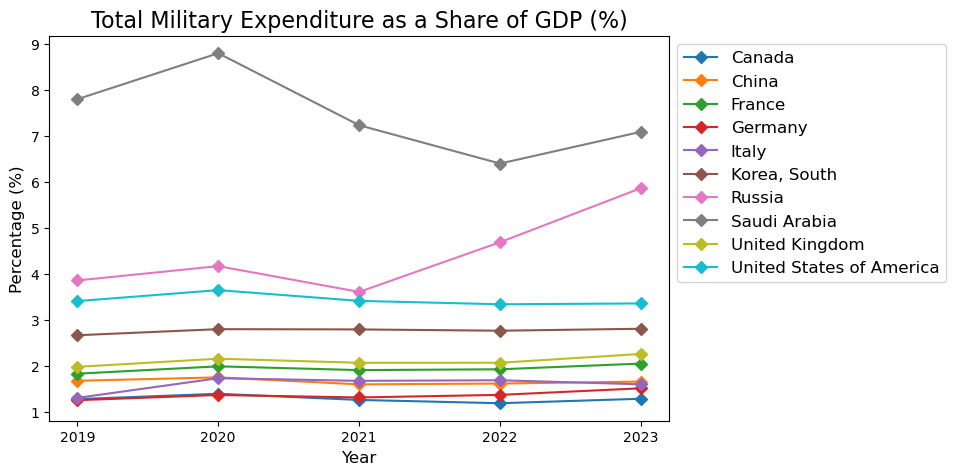

In [162]:
import matplotlib.pyplot as plt

# Create a figure of size 8x5
plt.figure(figsize=(8, 5))

# Loop through each country and plot its data
for i in country:
    plt.plot(military_GDP.loc[i, :], marker="D", label=i)

# Set legend location and fontsize
plt.legend(bbox_to_anchor=(1, 1), fontsize=12)

# Set the title and axis labels
plt.title("Total Military Expenditure vs total GDP (%)", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Percentage (%)", fontsize=12)

# Convert the columns (years) to integers if necessary
years = military_GDP.columns.astype(int)  # Assuming the columns represent the years

# Set the x-axis ticks to the actual years (ensuring they are integers)
plt.xticks(years)

# Optionally, save the plot to a file
# plt.savefig("military_spending_gdp.png", bbox_inches='tight')

# Display the plot
plt.show()

### Compare the overall military spending of the all 10 countries in absolute value

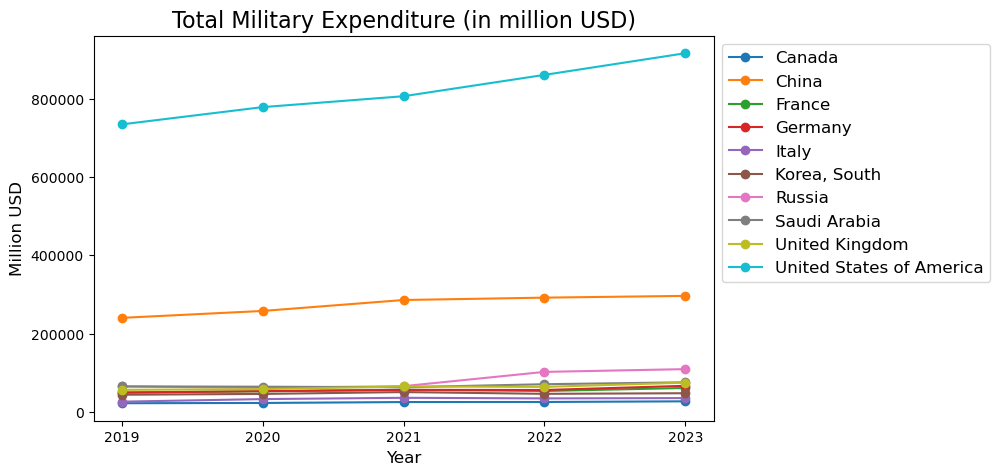

In [163]:
import matplotlib.pyplot as plt

# Create a figure of size 8x5
plt.figure(figsize=(8, 5))

# Loop through each country and plot its military spending
for i in country:
    plt.plot(military_spending.loc[i, :], marker="o", label=i)  # Add label for each country

# Set the x-axis ticks to show only the actual years
years = military_spending.columns.astype(int)  # Convert column names (years) to integers
plt.xticks(years)  # Set the ticks to be exactly the year values

# Set legend location and fontsize
plt.legend(bbox_to_anchor=(1, 1), fontsize=12)

# Set the title and axis labels
plt.title("Total Military Expenditure (in million USD)", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Million USD", fontsize=12)

# Optionally, save the plot to a file
plt.savefig("total_military_spending_billion.png", bbox_inches='tight')

# Display the plot
plt.show()

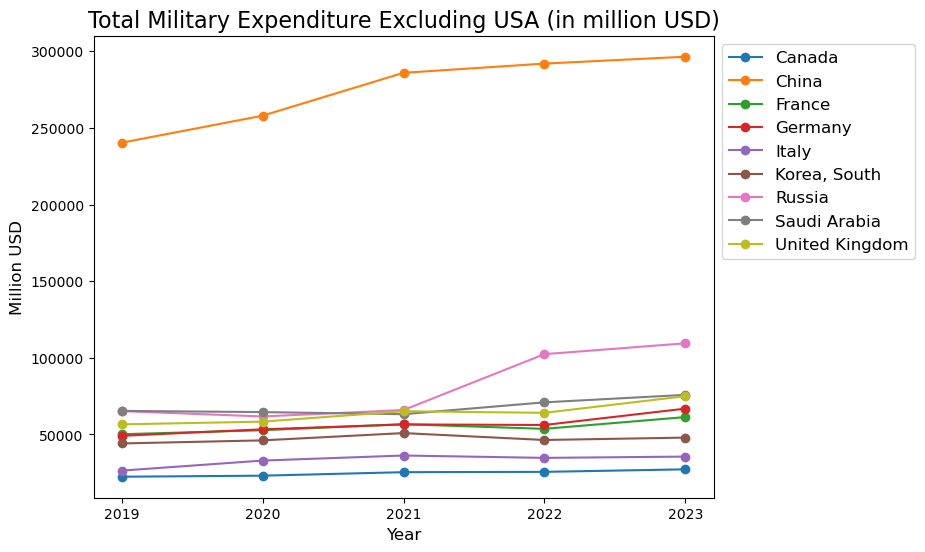

In [164]:
import matplotlib.pyplot as plt

# Create a figure of size 8x6
plt.figure(figsize=(8, 6))

# Loop through each country and plot its military spending (excluding USA)
for i in country:
    if i == "United States of America":
        continue  # Skip plotting for the USA
    else:
        plt.plot(military_spending.loc[i, :], marker="o", label=i)  # Add label for the legend

# Convert the years (columns) to integers and set the x-axis ticks
years = military_spending.columns.astype(int)
plt.xticks(years)

# Set legend location and fontsize
plt.legend(bbox_to_anchor=(1, 1), fontsize=12)

# Set the title and axis labels
plt.title("Total Military Expenditure Excluding USA (in million USD)", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Million USD", fontsize=12)

# Optionally, save the plot to a file
plt.savefig("total_military_spending_no_us.png", bbox_inches='tight')

# Display the plot
plt.show()


### Compare the overall military spending of the all 10 countries in percentages

In [115]:
# calculate the sum of each column in military spending sheet.
military_spending_sum = military_spending.sum(axis=0)
# each row in military_spending divided by the military_spending_sum array to calculate the share of each country's military spending yearly
military_spending_div = military_spending.div(military_spending_sum, axis=1)*100
military_spending_div

,2019,2020,2021,2022,2023
Country,,,,,
Canada,1.6541,1.6151,1.6774,1.5916,1.5905
China,17.7513,18.0506,18.9104,18.1743,17.3207
France,3.7019,3.6908,3.7464,3.3390,3.5818
Germany,3.6251,3.7307,3.7376,3.4955,3.9046
Italy,1.9485,2.3041,2.3963,2.1596,2.0759
"Korea, South",3.2575,3.2268,3.3646,2.8862,2.8003
Russia,4.8159,4.3181,4.3589,6.3723,6.3954
Saudi Arabia,4.8278,4.5172,4.1795,4.4147,4.4297
United Kingdom,4.1782,4.0816,4.3079,3.9891,4.3789


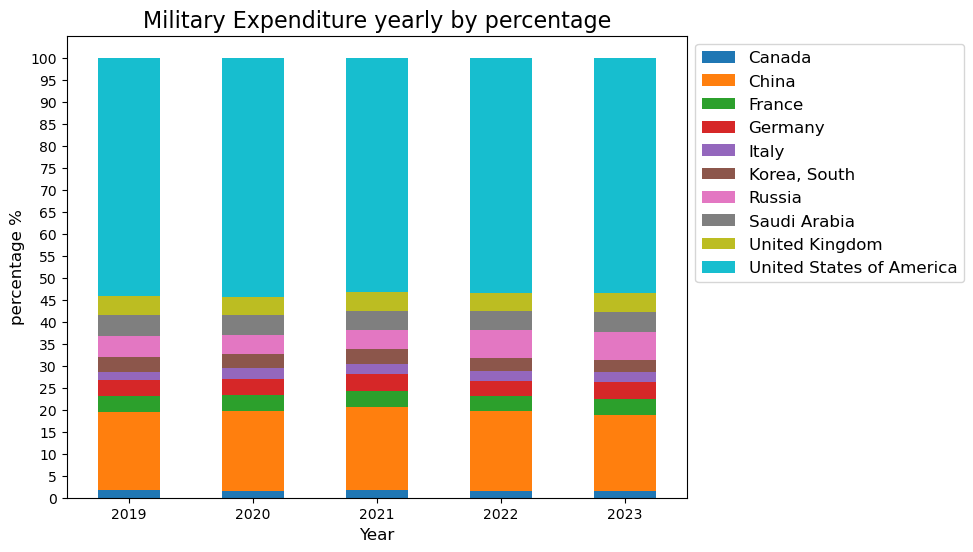

In [116]:
# plot stacked bar chart: each country's share of military spending by year    
military_spending_div.T.plot(figsize=(8, 6), kind="bar", stacked=True)
plt.legend(bbox_to_anchor=(1, 1), fontsize=12)
plt.title("Military Expenditure yearly by percentage", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("percentage %", fontsize=12)
# turn the x axis scale to 0 degree
plt.xticks(rotation=0, fontsize=10)
# set y axis scale from 0 to 105 with 5 added each time
plt.yticks(np.arange(0, 105, 5))
plt.savefig("military_spending_yearly_per.png", bbox_inches='tight') #save the plots to folder 
plt.show()

In [117]:
# def pie chart function
def plot_pie(year):
    # explode: each part's distance from the center 
    plt.pie(military_spending[year], labels=list(military_spending.index), explode=(0,0.1,0,0,0,0,0.1,0.1,0,0.1), 
            autopct="%.1f%%", pctdistance=0.85, labeldistance=1.1, startangle=90)
    plt.title("Overall military spending year " + str(year) + " in %")

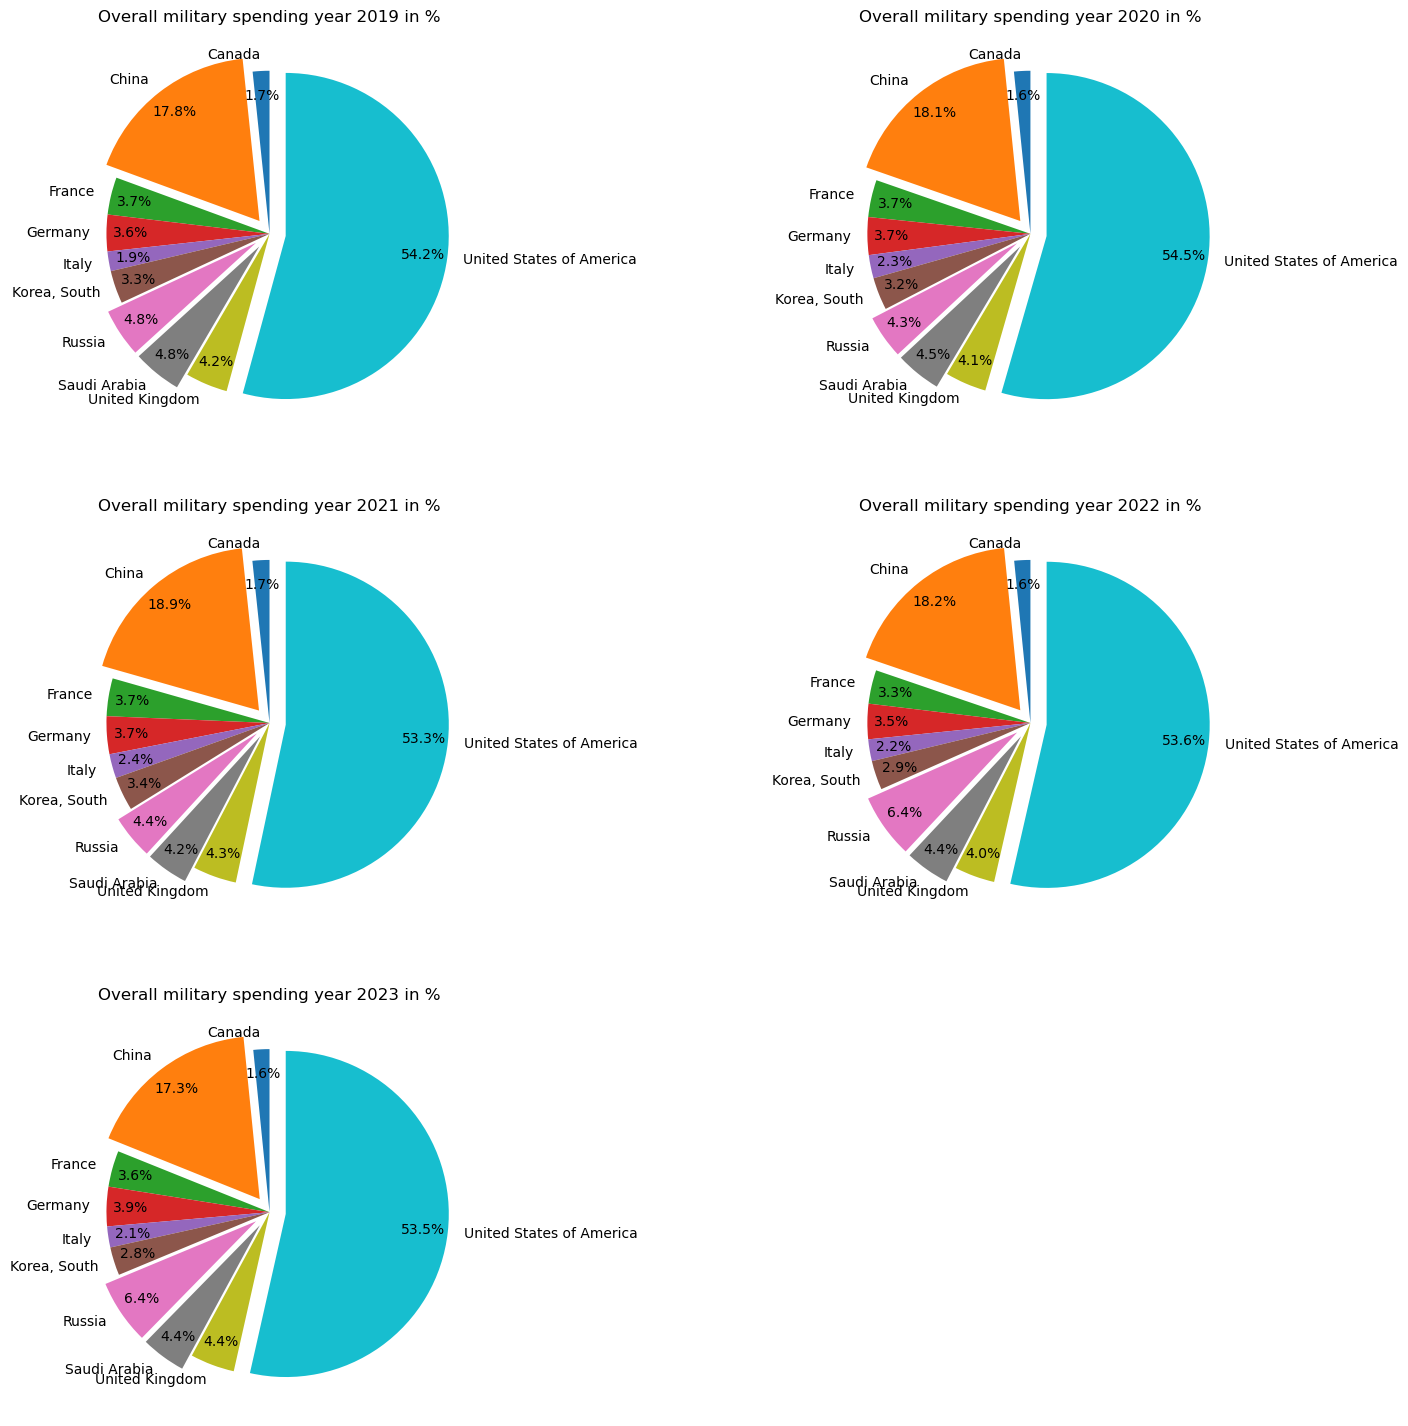

In [118]:
# subplot military spending yearly to compare in percentage
plt.figure(figsize=(18,18))
plt.subplot(321)
plot_pie(2019)
plt.subplot(322)
plot_pie(2020)
plt.subplot(323)
plot_pie(2021)
plt.subplot(324)
plot_pie(2022)
plt.subplot(325)
plot_pie(2023)
plt.savefig("overall_military_spending_pie.png", bbox_inches='tight') #save the plots to folder 
plt.show()

### Compare the per person military spending to the per person GDP in absolute

In [119]:
# stack the military_capta and gdp_pc dataframe 
stack_military_capta = military_capta.stack()
stack_gdp_pc = gdp_pc.stack()
# combine the two stacked dataframe by concat function
military_spending_gdp_pc = pd.concat([stack_military_capta,stack_gdp_pc], axis=1)
military_spending_gdp_pc.columns = ["military_spending", "GDP"]
military_spending_gdp_pc.index.names = ["Country", "Year"]
military_spending_gdp_pc.head(8)

military_spending        GDP
Country Year                              
Canada  2019           596.8306 46463.5998
        2020           609.2210 43489.8250
        2021           664.7160 52451.5862
        2022           664.8969 55603.7153
        2023           701.9299 54286.8606
China   2019           169.0264 10043.6922
        2020           181.0429 10305.8538
        2021           200.5273 12491.8933

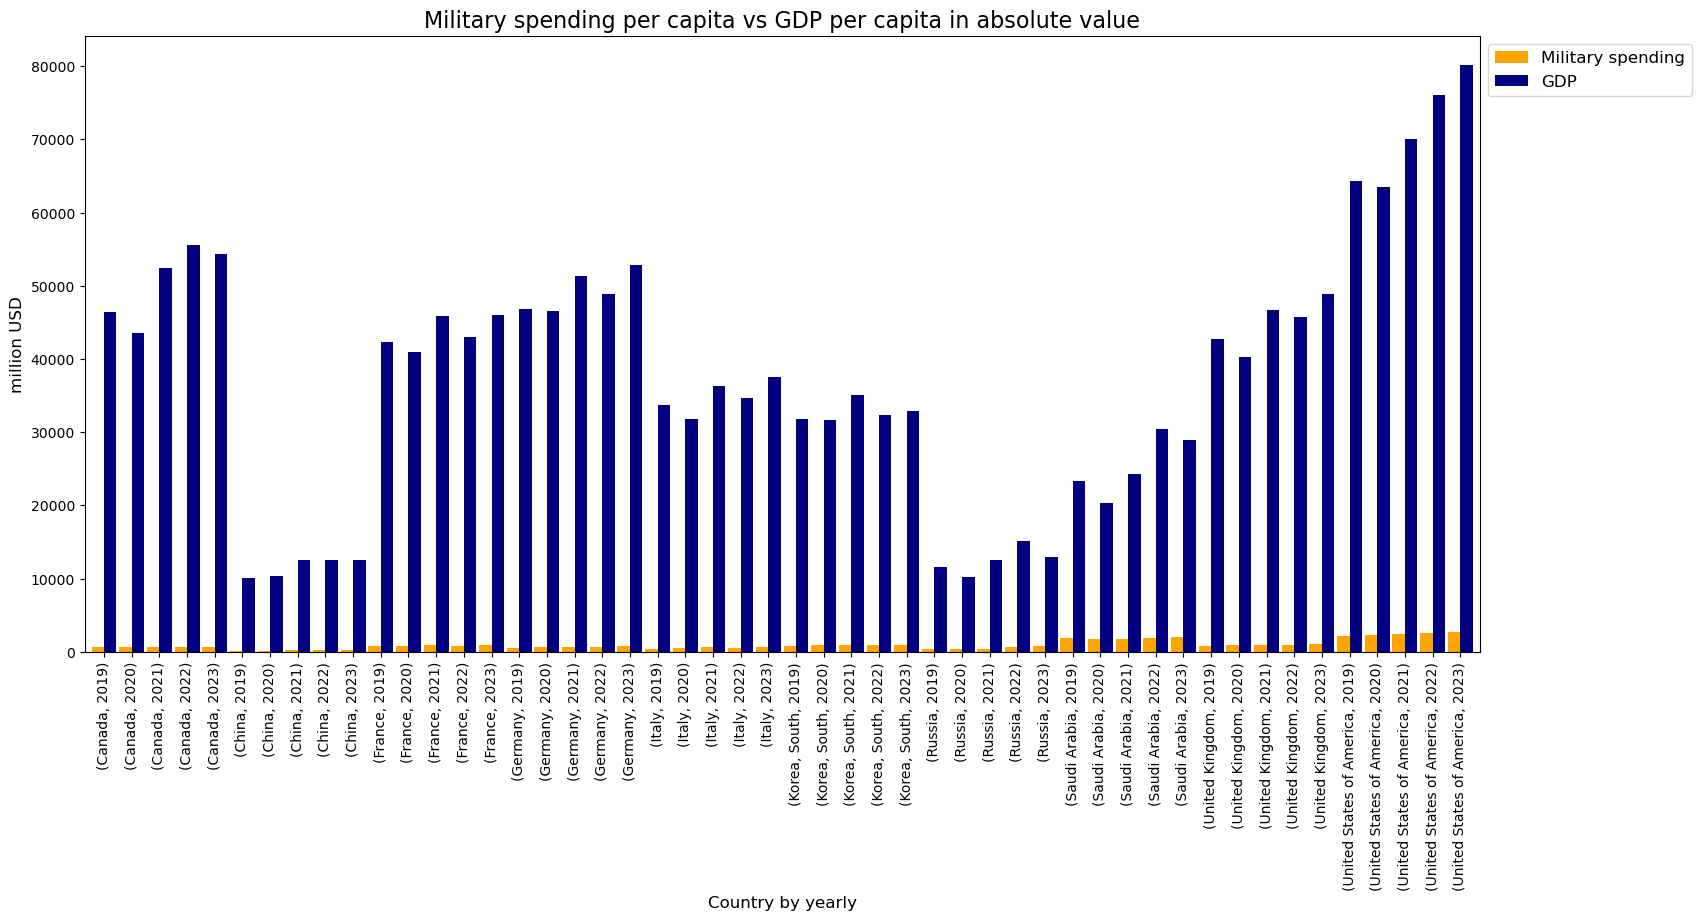

In [120]:
# plot bar chart: the camparison of military spending per person and GDP per person 
military_spending_gdp_pc.plot(figsize=(18, 8), kind="bar",color=("orange", "navy"), width=0.9)
plt.legend(["Military spending", "GDP"], bbox_to_anchor=(1, 1), fontsize=12)
plt.title("Military spending per capita vs GDP per capita in absolute value", fontsize=16)
plt.xlabel("Country by yearly", fontsize=12)
plt.ylabel("million USD", fontsize=12)
plt.savefig("military_spending_gdp_pc_ab.png", bbox_inches='tight') #save the plots to folder 
plt.show()

In [121]:
# define function to plot the camparison of military spending per person and GDP per person by country
def per_capita_absolute(country):
    df = military_spending_gdp_pc.loc[country]
    df.plot(figsize=(12,5), kind="barh", color=("orange","navy"))
    plt.legend(["Military spending","GDP"], bbox_to_anchor=(1.25, 1), fontsize=12)
    plt.xlabel("current USD")
    plt.title("Military spending per capita vs GDP per capita yearly for " + str(country), fontsize=16)
    plt.xticks(np.arange(0, 70000, 5000)) 
    plt.savefig("military_spending_gdp_pc_" + str(country) + ".png", bbox_inches="tight") #save the plots to folder 
    plt.show()  

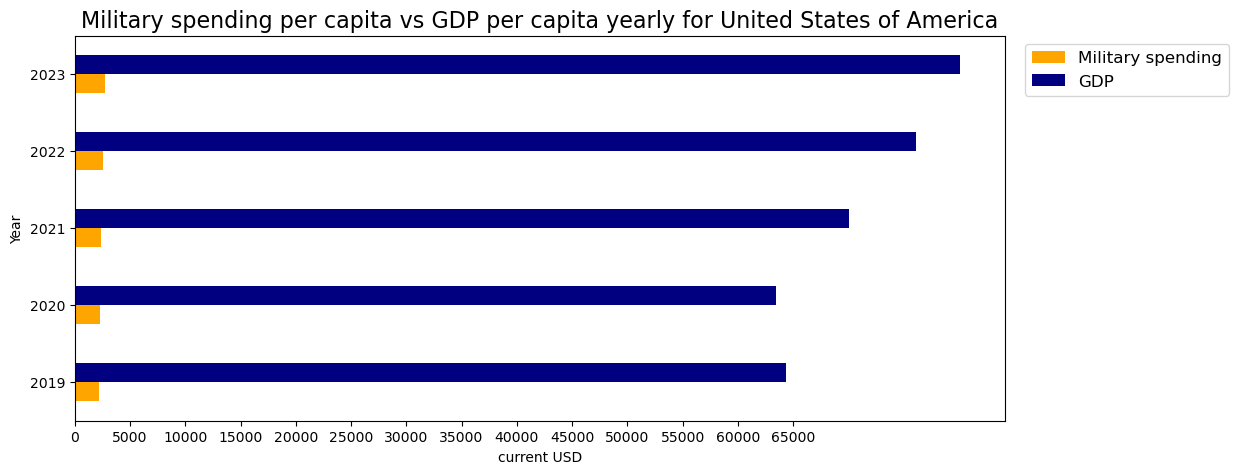

In [122]:
per_capita_absolute("United States of America")

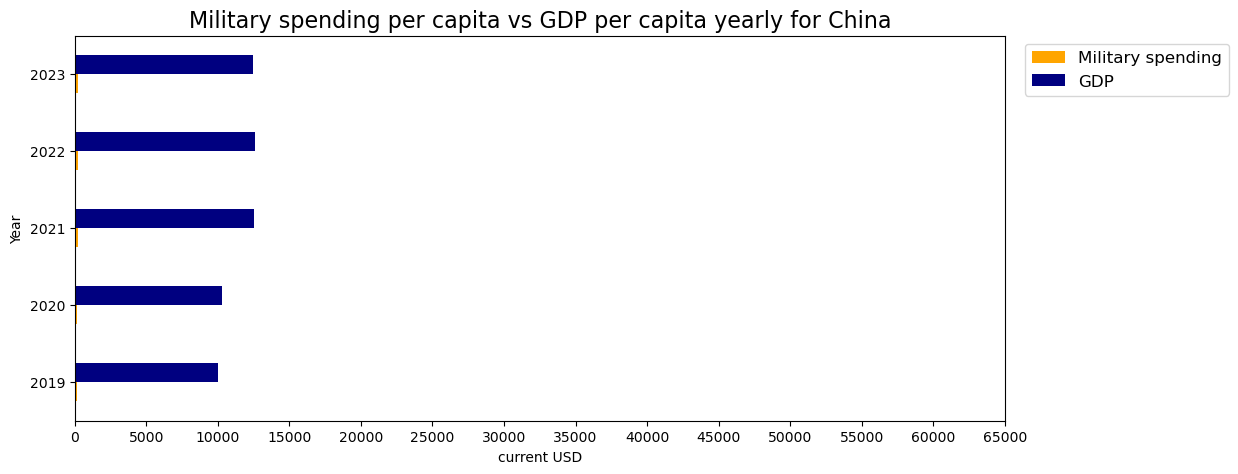

In [123]:
per_capita_absolute("China")

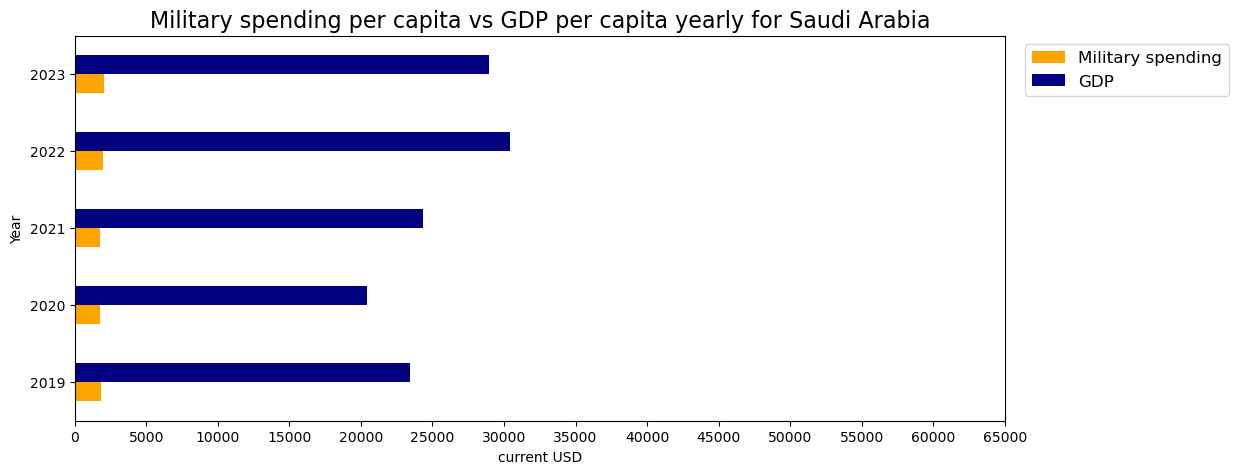

In [124]:
per_capita_absolute("Saudi Arabia")

### Compare the per person military spending to the per person GDP in percentage


In [125]:
# conduct the per person military spending to per person GDP in percentage by dividing the two data frame 
pct_pc = military_capta/gdp_pc*100
pct_pc

,2019,2020,2021,2022,2023
Country,,,,,
Canada,1.2845,1.4008,1.2673,1.1958,1.2930
China,1.6829,1.7567,1.6053,1.6231,1.6653
France,1.8365,1.9965,1.9144,1.9324,2.0564
Germany,1.2618,1.3743,1.3210,1.3771,1.5197
Italy,1.3115,1.7390,1.6813,1.6946,1.6058
"Korea, South",2.6713,2.8033,2.7975,2.7695,2.8120
Russia,3.8603,4.1715,3.6117,4.6900,5.8642
Saudi Arabia,7.7946,8.7922,7.2292,6.3974,7.0864
United Kingdom,1.9853,2.1622,2.0732,2.0739,2.2649


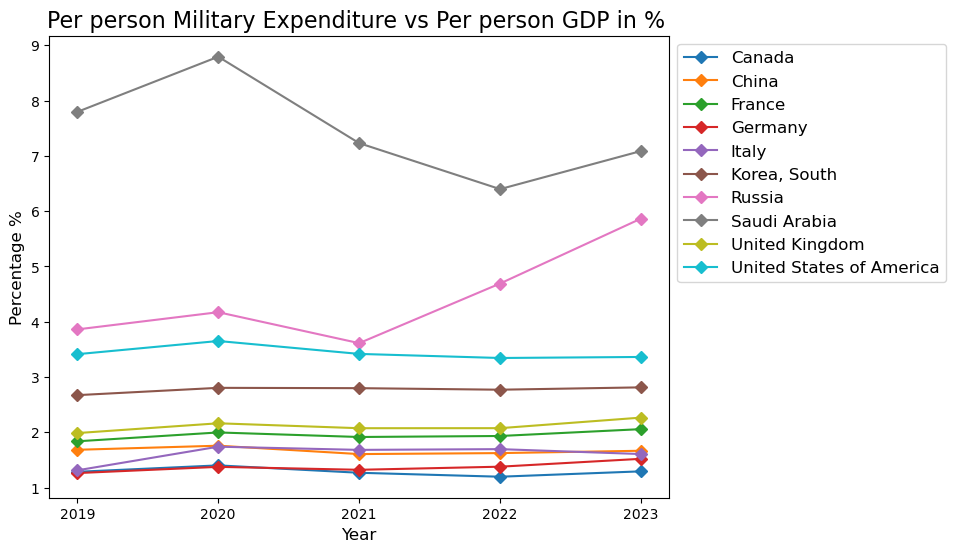

In [126]:
# plot line graph: percentage of per person military spending to per person GDP 
plt.figure(figsize=(8, 6))

for i in country:
    plt.plot(pct_pc.loc[i,:], marker="D")

# Set the x-axis ticks to show only the actual years
years = military_spending.columns.astype(int)  # Convert column names (years) to integers
plt.xticks(years)  # Set the ticks to be exactly the year values

plt.legend(country,bbox_to_anchor=(1, 1), fontsize=12)
plt.title("Per person Military Expenditure vs Per person GDP in % ", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Percentage %", fontsize=12)
plt.savefig("military_spending_gdp_pc_per.png", bbox_inches="tight") #save the plots to folder 
plt.show()

### The fastest growing countries in military spending in absolute

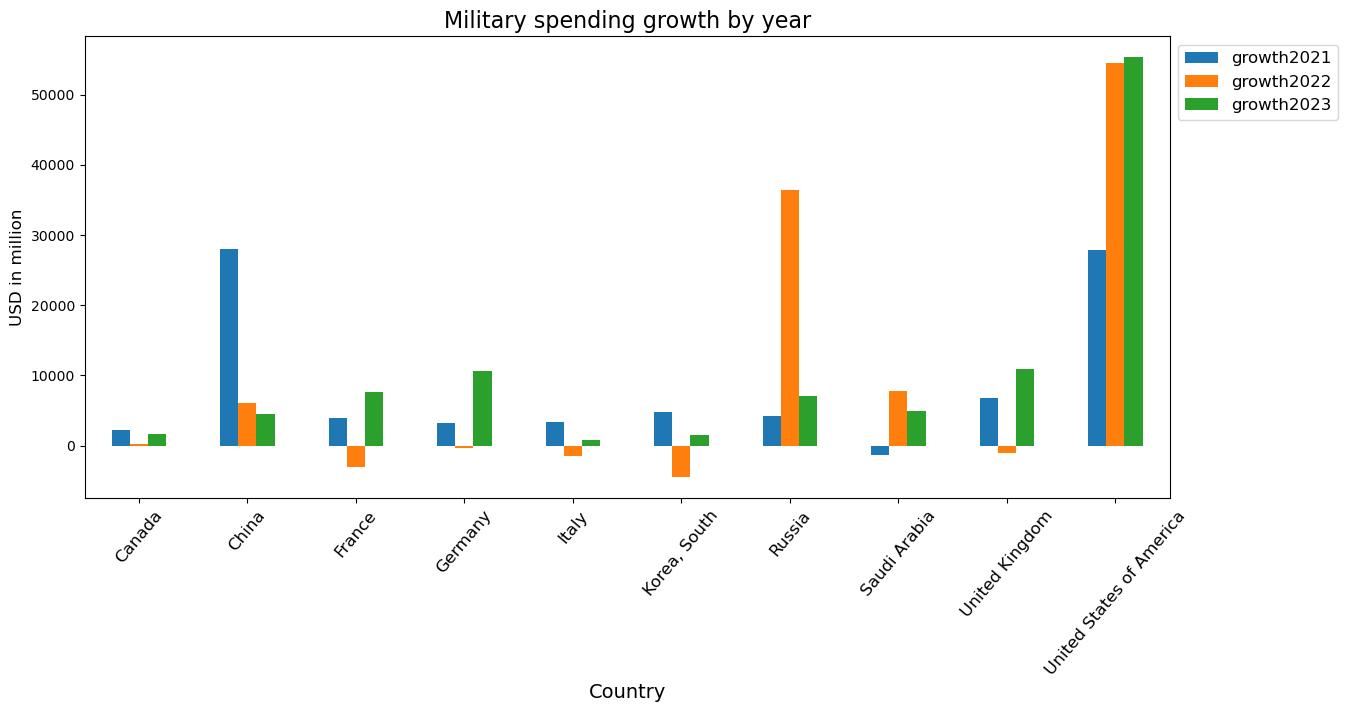

In [127]:
# define fucntion to calculate the yearly military spending growth 
def growth_military_spending(df):
    for year in range(2019, 2023):
        # add growth columns 
        df["growth"+ str(year+1)] = df[year+1] - df[year]
    df = df.iloc[:, 6:]
    
    # plot bar chart by country show yearly growth 
    df.plot(figsize=(14, 6), kind="bar")
    plt.legend(bbox_to_anchor=(1, 1), fontsize=12)
    plt.title("Military spending growth by year", fontsize=16)
    plt.xlabel("Country", fontsize=14)
    plt.ylabel("USD in million", fontsize=12)
    plt.xticks(rotation=50, fontsize=12)
    plt.savefig("military_growth_by_year.png", bbox_inches='tight') #save the plots to folder 
    plt.show()

military_spending_g = military_spending.copy()
growth_military_spending(military_spending_g)

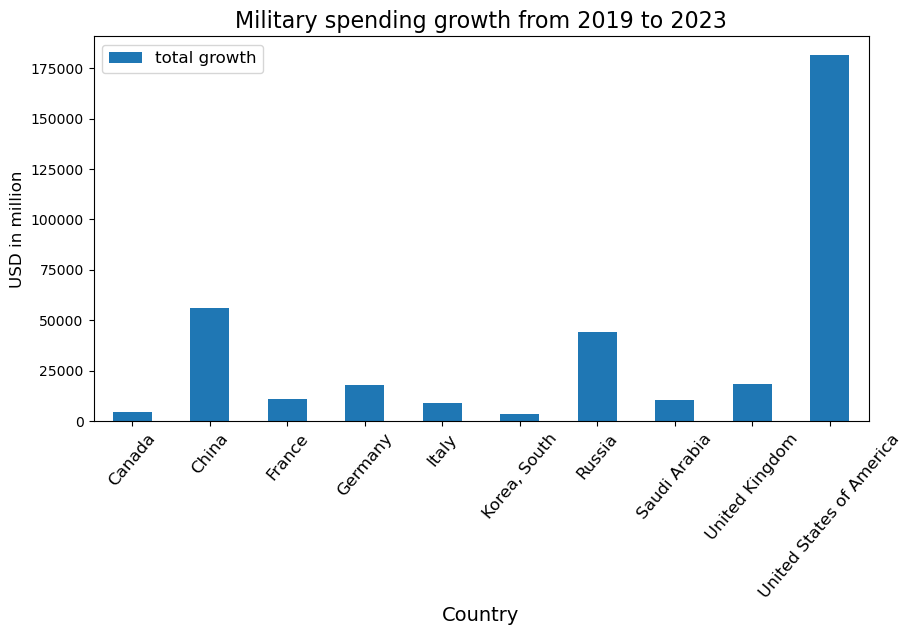

In [128]:
# define a function to calculate the total growth of military spending from 2019 to 2023 
def military_spending_total_growth(df):
    df = df.loc[:, [2023, 2019]]
    # calculate total growth
    df["total growth"] = df[2023] - df[2019]
    # delete 2012 and 2017 columns
    del df[2023]
    del df[2019]
    
    # plot bar chart of the growth from 2012 to 2017 
    df.plot.bar(figsize=(10,5))
    plt.legend(fontsize=12)
    plt.title("Military spending growth from 2019 to 2023", fontsize=16)
    plt.xlabel("Country", fontsize=14)
    plt.ylabel("USD in million", fontsize=12)
    plt.xticks(rotation=50, fontsize=12)
    plt.savefig("military_netgrowth.png", bbox_inches="tight") #save the plots to folder 
    plt.show()
    
military_spending_total_growth(military_spending)

In [129]:
# calculate percentage change in military spending 
military_spending_growth_pct = military_spending.T.pct_change()*100
military_spending_growth_pct = military_spending_growth_pct.iloc[1:6,:]
military_spending_growth_pct

Country,Canada,China,France,Germany,Italy,"Korea, South",Russia,Saudi Arabia,United Kingdom,United States of America
2020,3.0717,7.3402,5.2438,8.6375,24.8228,4.5686,-5.3508,-1.2305,3.1198,5.9990
2021,9.8752,10.8372,7.3936,5.9912,10.0326,10.3144,6.7979,-2.1124,11.6639,3.5757
2022,0.8111,2.1082,-5.3105,-0.6370,-4.2526,-8.8619,55.3182,12.2247,-1.6190,6.7551
2023,6.4675,1.5345,14.2855,19.0079,2.4128,3.3649,6.9239,6.8998,16.9490,6.4277


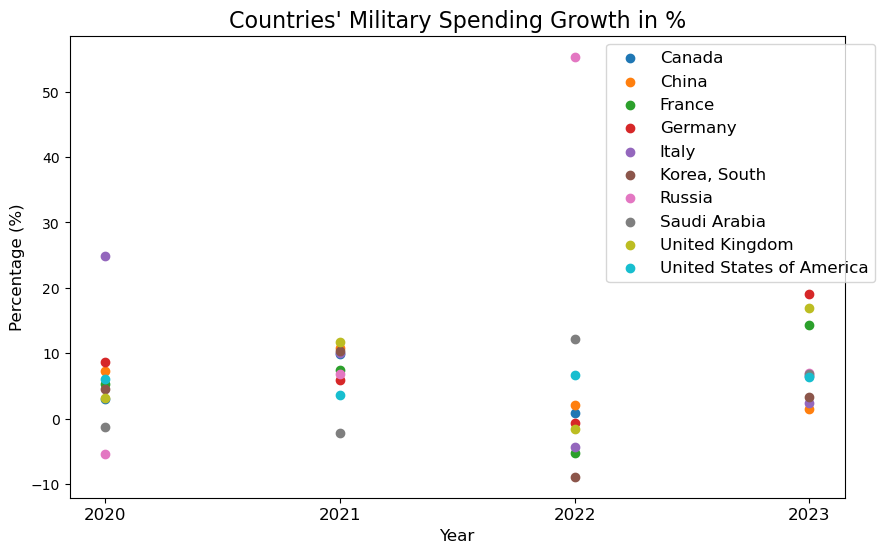

<Figure size 640x480 with 0 Axes>

In [130]:
import matplotlib.pyplot as plt

# Create a scatter plot for the yearly growth rate of military spending
plt.figure(figsize=(10, 6))

# Plot each country's growth percentage
for country in military_spending_growth_pct.columns:
    plt.scatter(military_spending_growth_pct.index, military_spending_growth_pct[country], label=country)

# Customize the legend and its position
plt.legend(bbox_to_anchor=(1.05, 1), fontsize=12)

# Set the title and labels for the axes
plt.title("Countries' Military Spending Growth in %", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Percentage (%)", fontsize=12)

# Customize x-axis ticks with the years
plt.xticks(list(military_spending_growth_pct.index), fontsize=12)

# Optionally save the plot to a file
plt.savefig("countries_growth.png", bbox_inches="tight") # Save the plot as an image


# Show the plot
plt.show()

# Optionally save the plot to a file
plt.savefig("countries_growth.png", bbox_inches="tight") # Save the plot as an image
